# Multiple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from sklearn.datasets import load_boston
dataset = load_boston()

## Print the keys of the dataset

In [3]:
dataset.keys()

dict_keys([&#39;data&#39;, &#39;target&#39;, &#39;feature_names&#39;, &#39;DESCR&#39;, &#39;filename&#39;])

## Print the description of the dataset to know about the features

In [4]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Load the data into a pandas DataFrame 
(We will only load the columns of features for ease of use)

In [5]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

## Print the first 5 rows of the dataset

In [6]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


## Load the target column(the y variable in regression) to the dataframe

In [7]:
df['MEDV'] = dataset.target

In [8]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


## Check if there are any missing values in the data

In [9]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Print basic stats of the dataset

In [11]:
print(df.info())

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Plot the target variable to observe its characteristics 

In [13]:
plt.style.use('seaborn')

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 &lt;BarContainer object of 10 artists&gt;)

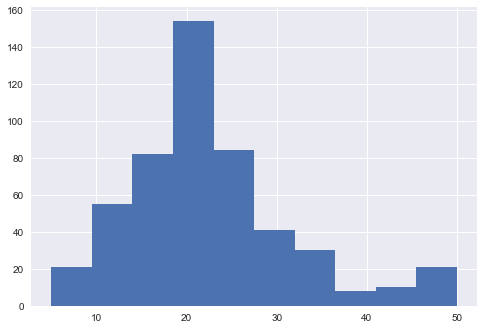

In [14]:
plt.hist(df['MEDV'].values)

In [15]:
import seaborn as sns

## Select the features (Selecting all the feature columns does not give a good prediction)

In [16]:
X = df[['LSTAT', 'RM', 'PTRATIO']]
X.head()

,LSTAT,RM,PTRATIO
0,4.98,6.575,15.3
1,9.14,6.421,17.8
2,4.03,7.185,17.8
3,2.94,6.998,18.7
4,5.33,7.147,18.7


In [17]:
y = df['MEDV']
print(y.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


&lt;seaborn.axisgrid.PairGrid at 0x202ce6543d0&gt;

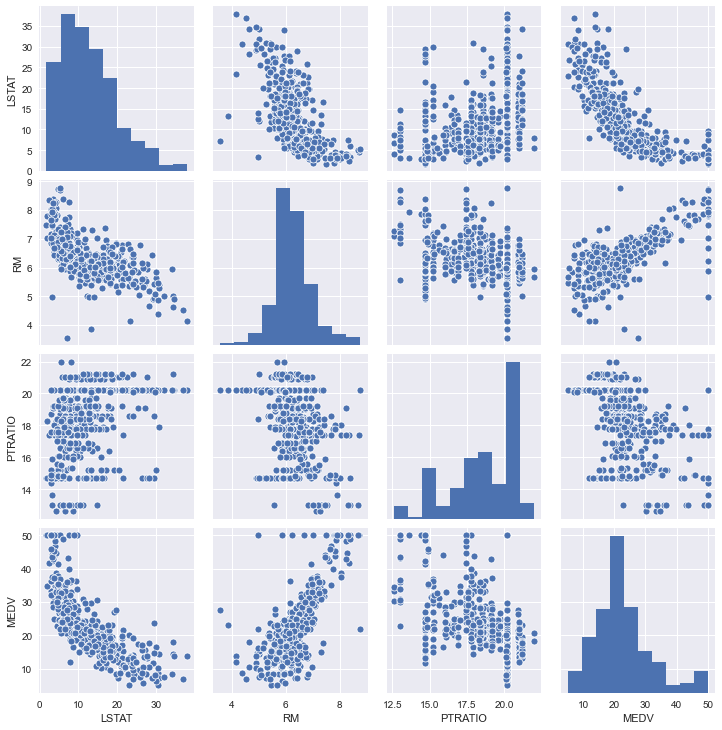

In [21]:
sns.pairplot(df[['LSTAT', 'RM', 'PTRATIO', 'MEDV']], size= 2.5)

## Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [24]:
y_pred = regressor.predict(X_test)

## Print the predicted and actual values

In [25]:
np.set_printoptions(precision=2)
print(f"The predicted values are : \n {y_pred}")

The predicted values are : 
 [27.61 22.1  26.53 12.51 22.25 20.17 19.67 21.18 17.05 21.48 14.61 17.25
 17.88  4.64 39.49 34.51 21.51 38.44 30.02 22.11 25.02 25.48 18.3  27.54
 22.04  9.88 17.64 22.58 35.56 19.95 17.07 18.55 23.04 24.02 27.33 17.4
 11.2  21.02 17.99 13.48 27.04 20.22 25.8  13.78 28.87 25.93 21.42 24.76
 11.38 23.55 24.92 16.26 23.06 35.51 14.53 22.83 22.01 20.53 19.81 18.37
 23.84 21.86 32.71 30.04 16.94 32.09 19.25 22.18 18.91 21.76 22.67 24.44
 29.87 30.69 25.41  3.99 37.15 23.56 26.1  18.81 29.1  19.07 18.01 37.13
 38.8  25.14 23.33 16.94 30.84 16.08 16.64 15.95 27.66 33.02 21.35 23.1
 -3.13 28.27 18.47 18.56 24.68 20.83]


In [26]:
print(f"The actual values are : \n {y_test.to_numpy()}")

The actual values are : 
 [22.6 50.  23.   8.3 21.2 19.9 20.6 18.7 16.1 18.6  8.8 17.2 14.9 10.5
 50.  29.  23.  33.3 29.4 21.  23.8 19.1 20.4 29.1 19.3 23.1 19.6 19.4
 38.7 18.7 14.6 20.  20.5 20.1 23.6 16.8  5.6 50.  14.5 13.3 23.9 20.
 19.8 13.8 16.5 21.6 20.3 17.  11.8 27.5 15.6 23.1 24.3 42.8 15.6 21.7
 17.1 17.2 15.  21.7 18.6 21.  33.1 31.5 20.1 29.8 15.2 15.  27.5 22.6
 20.  21.4 23.5 31.2 23.7  7.4 48.3 24.4 22.6 18.3 23.3 17.1 27.9 44.8
 50.  23.  21.4 10.2 23.3 23.2 18.9 13.4 21.9 24.8 11.9 24.3 13.8 24.7
 14.1 18.7 28.1 19.8]


## Evaluating the Model Performance

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4881642015692508